In [16]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'deep-learning-for-msc-202324:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F68978%2F7709659%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240317%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240317T191610Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D445151804c847c227fd2f9036dc9993a3d3cde59e6aa645810816ec510eea1cf49978b79e1c8be4cacca6b264bb7dbdb25aaf3f598b4c41cb5db32328fc395c322483673ef1b1f7515e7dfaedb15cb10544a88a3c499056f8c320c0fee3a1dce46ca377ae7ea503613d3cb45a37216eb430836c5132f3ad005278f8dcdbb3ee56142add2c096fcb07591118461b6a0c41eb9841dc5b97f54287a29a0f8533462a5fb062f182a984139d425201d0afe4a6bcf268130684313b5e300e3bdad6f9b2e8dc0155223e3208559ea2491571b4f2e15bb02f3f62cfc6e090b0b2a905d5281ec83dc709f737d46f78f01b16985c59d00992939b7f0da3715d582b80e4b0c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 198343318 bytes downloaded
Downloaded and uncompressed: deep-learning-for-msc-202324
Data source import complete.


In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/deep-learning-for-msc-202324/train/1V9L_1_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/2B3Z_1_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1CHK_1_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1US5_1_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1WMZ_1_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1SX5_3_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1HN6_1_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1HBX_3_G_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1K61_3_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1JMP_1_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1BWV_2_S_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1S7J_1_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/1XRD_1_A_train.csv
/kaggle/input/deep-learning-for-msc-202324/train/2PHL_1_A_train.c

In [18]:
# !pip install torch

In [19]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os
import torch

import torch
from torch.utils.data import Dataset
import pandas as pd
import os

# 假设已经定义了一个函数encode_label将标签编码为整数

class ProteinDataset(Dataset):
    def __init__(self, sequences_csv, labels_csv, pssm_dir):
        self.labels_df = pd.read_csv(labels_csv)
        self.sequences_df = pd.read_csv(sequences_csv)
        self.pssm_dir = pssm_dir
#         self.pdb_ids = self.labels_df['PDB_ID'].unique()


    def __len__(self):
        return len(self.sequences_df)

    def __getitem__(self, idx):
#         pdb_id = self.pdb_ids[idx]
        pdb_id = self.sequences_df.iloc[idx]['PDB_ID']
        sequence = self.sequences_df.iloc[idx]['SEQUENCE']
        label = self.labels_df[self.labels_df['PDB_ID'] == pdb_id]['SEC_STRUCT'].values[0]

        # 加载PSSM文件
        pssm_path = os.path.join(self.pssm_dir, f"{pdb_id}_train.csv")
        pssm_df = pd.read_csv(pssm_path, usecols=lambda column : column not in ["RES_NUM", "AMINO_ACID"])
        # 转换为数值类型，并填充NaN值
        pssm_df = pssm_df.apply(pd.to_numeric, errors='coerce').fillna(0)
        pssm_tensor = torch.tensor(pssm_df.values, dtype=torch.float32).T  # 转置以匹配模型输入 [sequence_length, num_amino_acids]

        # 编码标签
        label_encoded = encode_label(label)

        return pssm_tensor, label_encoded

# 一个示例encode_label函数，您需要根据实际标签进行调整
def encode_label(label):
    label_dict = {'H': 0, 'E': 1, 'C': 2}  # 示例的标签字典
    return torch.tensor([label_dict[aa] for aa in label], dtype=torch.long)



In [20]:
import torch.nn as nn
import torch.nn.functional as F

class FullyConvNet(nn.Module):
    def __init__(self, num_classes):
        super(FullyConvNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=20, out_channels=64, kernel_size=3, padding=1)
        # 后续层保持不变...

        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(256)
        self.final_conv = nn.Conv1d(256, num_classes, kernel_size=1)

    def forward(self, x):
        # Assuming `x` is your input tensor with shape [32, 1231, 20]
        x = x.permute(0, 2, 1)  # Permute to get [batch_size, num_channels, sequence_length]

        # Now, `x` has the shape [32, 20, 1231], which matches the expected input shape of the Conv1D layer
#         x = F.relu(self.bn1(self.conv1(x)))

        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.final_conv(x)
        return F.log_softmax(x, dim=1)  # 使用log_softmax为后续的NLLLoss准备


In [21]:
import matplotlib.pyplot as plt
# def calculate_accuracy(predictions, targets):
#     # Get the predicted class for each sequence
#     _, predicted_classes = predictions.max(dim=1)
#     # Compare with the target class
#     correct = (predicted_classes == targets).sum().item()
#     # Compute accuracy
#     accuracy = correct / targets.size(0)
#     return accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)



def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    train_accuracy = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        total_correct = 0
        total_samples = 0

        for sequences, labels in train_loader:
            sequences, labels = sequences.to(device), labels.to(device)

            outputs = model(sequences)
            loss = criterion(outputs, labels)

            labels_flat = labels.view(-1)
            output_flat = outputs.view(-1, num_classes)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

#             _, predicted = torch.max(outputs.data, 1)
#             total_correct += (predicted == labels).sum().item()
#             total_samples += labels.size(0)
             # 忽略填充位置后计算准确率
            _, predicted = torch.max(output_flat, 1)
            mask = labels_flat != -1  # 创建一个掩码，以忽略填充的位置
            total_correct += (predicted[mask] == labels_flat[mask]).sum().item()
            total_samples += mask.sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = total_correct / total_samples
        train_losses.append(epoch_loss)
        train_accuracy.append(epoch_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")


    # 绘制损失和准确率曲线
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.title('Loss during training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.title('Accuracy during training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Epoch 1/5, Loss: 0.6873, Accuracy: 0.3580
Epoch 2/5, Loss: 0.6112, Accuracy: 0.3590
Epoch 3/5, Loss: 0.5915, Accuracy: 0.3588
Epoch 4/5, Loss: 0.5790, Accuracy: 0.3593
Epoch 5/5, Loss: 0.5721, Accuracy: 0.3588


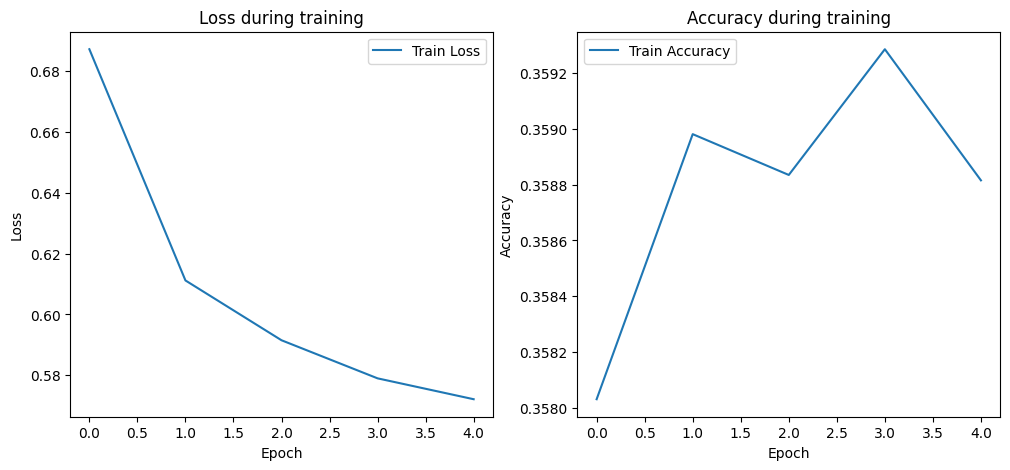

In [22]:
from torch.utils.data import DataLoader
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.optim import Adam
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import os
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader

from torch.nn.utils.rnn import pad_sequence
import matplotlib.pyplot as plt

def collate_fn(batch):
    sequences, labels = zip(*batch)

    # Your sequence handling code here...
    sequences_transposed = [seq.transpose(0, 1) for seq in sequences]  # This might already be correct depending on your data
    sequences_padded = pad_sequence(sequences_transposed, batch_first=True, padding_value=0)

    # Handling variable-length label sequences
    # Convert labels to tensors if they aren't already
#     labels_tensors = [torch.tensor(label, dtype=torch.long) for label in labels]
    # Adjusted line to create new tensors from existing ones
    labels_tensors = [label.clone().detach().long() for label in labels]

    # Pad label sequences so they all have the same length
    labels_padded = pad_sequence(labels_tensors, batch_first=True, padding_value=-1)  # Assuming -1 is an appropriate padding value for your task

    return sequences_padded, labels_padded



# 假设您已经定义了ProteinDataset类

# 假设您的数据和PSSM文件存放在指定目录下
sequences_csv = '/kaggle/input/deep-learning-for-msc-202324/seqs_train.csv'
labels_csv = '/kaggle/input/deep-learning-for-msc-202324/labels_train.csv'
pssm_dir = '/kaggle/input/deep-learning-for-msc-202324/train/'

# 初始化数据集和数据加载器
train_dataset = ProteinDataset(sequences_csv, labels_csv, pssm_dir)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# 现在，在创建DataLoader时使用这个collate_fn
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

# 定义设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 初始化模型
num_classes = 3  # 假设有3个类别：Helix, Sheet, Coil
model = FullyConvNet(num_classes).to(device)  # 这行加在这里

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss(ignore_index=-1)
optimizer = Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 5
train_model(model, train_loader, criterion, optimizer, num_epochs, device)


In [23]:
def save_model_and_optimizer(model, optimizer, save_path="model_checkpoint.pth"):
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, save_path)
    print(f"Model and optimizer state dicts saved to {save_path}")

# 保存模型和优化器的状态
save_model_and_optimizer(model, optimizer, "model_checkpoint.pth")


Model and optimizer state dicts saved to model_checkpoint.pth


Epoch 1/20, Loss: 0.5637, Accuracy: 0.3584
Epoch 2/20, Loss: 0.5570, Accuracy: 0.3577
Epoch 3/20, Loss: 0.5521, Accuracy: 0.3582
Epoch 4/20, Loss: 0.5476, Accuracy: 0.3579
Epoch 5/20, Loss: 0.5438, Accuracy: 0.3575
Epoch 6/20, Loss: 0.5407, Accuracy: 0.3574
Epoch 7/20, Loss: 0.5362, Accuracy: 0.3578
Epoch 8/20, Loss: 0.5347, Accuracy: 0.3572
Epoch 9/20, Loss: 0.5296, Accuracy: 0.3568
Epoch 10/20, Loss: 0.5270, Accuracy: 0.3571
Epoch 11/20, Loss: 0.5227, Accuracy: 0.3566
Epoch 12/20, Loss: 0.5198, Accuracy: 0.3569
Epoch 13/20, Loss: 0.5176, Accuracy: 0.3572
Epoch 14/20, Loss: 0.5167, Accuracy: 0.3559
Epoch 15/20, Loss: 0.5120, Accuracy: 0.3558
Epoch 16/20, Loss: 0.5111, Accuracy: 0.3561
Epoch 17/20, Loss: 0.5085, Accuracy: 0.3550
Epoch 18/20, Loss: 0.5066, Accuracy: 0.3559
Epoch 19/20, Loss: 0.5053, Accuracy: 0.3554
Epoch 20/20, Loss: 0.5035, Accuracy: 0.3551


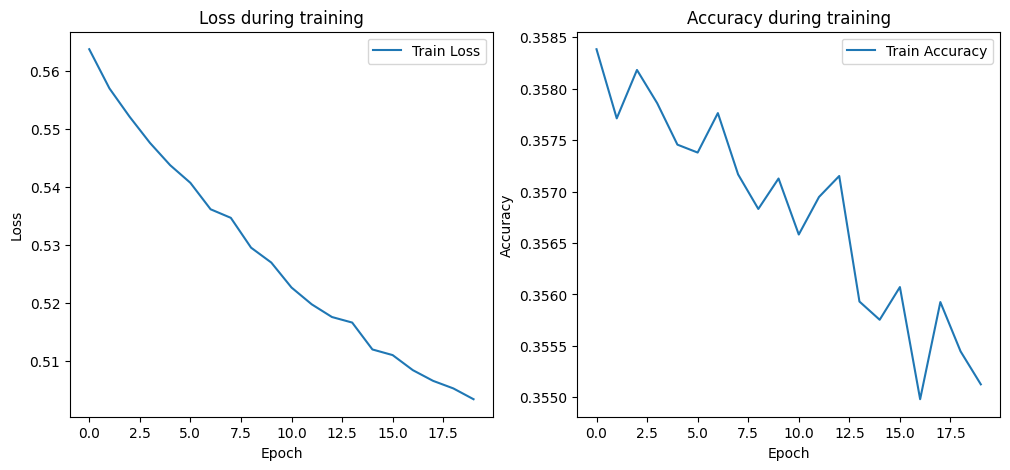

In [26]:
from torch.optim import Adam
import torch.nn as nn
import torch.optim as optim

def load_model_and_optimizer(model, optimizer, load_path="model_checkpoint.pth"):
    checkpoint = torch.load(load_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    print(f"Model and optimizer state dicts loaded from {load_path}")
num_classes =3
model = FullyConvNet(num_classes).to(device)  # 重新创建模型实例并移到设备上
optimizer = optim.Adam(model.parameters(), lr=1e-5)  # 重新创建优化器实例

# 加载模型和优化器状态
checkpoint = torch.load("model_checkpoint.pth", map_location=device)  # 确保加载到正确的设备
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# 对于优化器，需要手动确保优化器内部状态也在正确的设备上
for state in optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.to(device)

# 准备记录损失和准确率
train_losses = []
train_accuracy = []

# 继续训练
num_epochs = 20
train_model(model, train_loader, criterion, optimizer, num_epochs, device)
save_model_and_optimizer(model, optimizer, "model_checkpoint.pth")


Epoch 1/20, Loss: 0.5305, Accuracy: 0.3570
Epoch 2/20, Loss: 0.5259, Accuracy: 0.3568
Epoch 3/20, Loss: 0.5257, Accuracy: 0.3572
Epoch 4/20, Loss: 0.5209, Accuracy: 0.3564
Epoch 5/20, Loss: 0.5199, Accuracy: 0.3558
Epoch 6/20, Loss: 0.5164, Accuracy: 0.3557
Epoch 7/20, Loss: 0.5147, Accuracy: 0.3569
Epoch 8/20, Loss: 0.5130, Accuracy: 0.3563
Epoch 9/20, Loss: 0.5092, Accuracy: 0.3556
Epoch 10/20, Loss: 0.5085, Accuracy: 0.3558
Epoch 11/20, Loss: 0.5046, Accuracy: 0.3555
Epoch 12/20, Loss: 0.5035, Accuracy: 0.3554
Epoch 13/20, Loss: 0.5005, Accuracy: 0.3556
Epoch 14/20, Loss: 0.4988, Accuracy: 0.3554
Epoch 15/20, Loss: 0.4983, Accuracy: 0.3550
Epoch 16/20, Loss: 0.4955, Accuracy: 0.3555
Epoch 17/20, Loss: 0.4947, Accuracy: 0.3547
Epoch 18/20, Loss: 0.4938, Accuracy: 0.3548
Epoch 19/20, Loss: 0.4916, Accuracy: 0.3545
Epoch 20/20, Loss: 0.4915, Accuracy: 0.3535


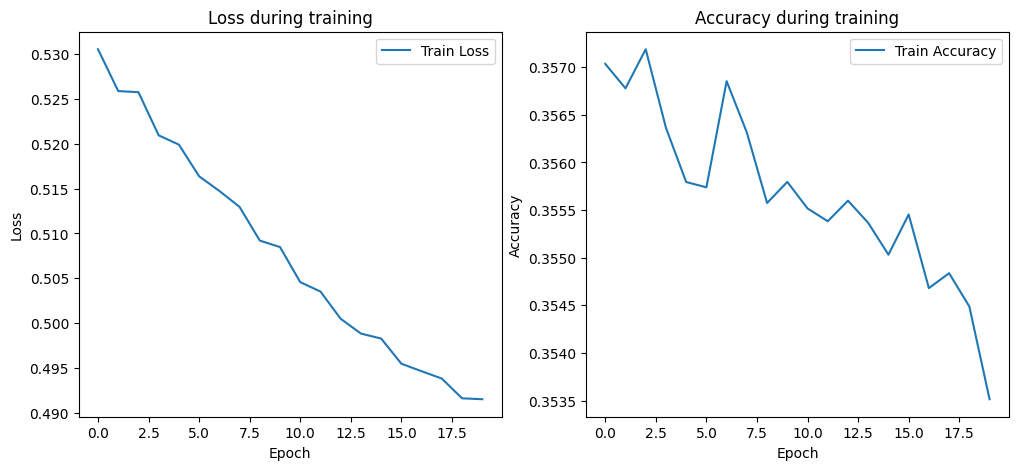

In [41]:
from torch.optim import Adam
import torch.nn as nn
import torch.optim as optim

def load_model_and_optimizer(model, optimizer, load_path="model_checkpoint.pth"):
    checkpoint = torch.load(load_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    print(f"Model and optimizer state dicts loaded from {load_path}")
num_classes =3
model = FullyConvNet(num_classes).to(device)  # 重新创建模型实例并移到设备上
optimizer = optim.Adam(model.parameters(), lr=1e-1)  # 重新创建优化器实例

# 加载模型和优化器状态
checkpoint = torch.load("model_checkpoint.pth", map_location=device)  # 确保加载到正确的设备
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# 对于优化器，需要手动确保优化器内部状态也在正确的设备上
for state in optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.to(device)

# 准备记录损失和准确率
train_losses = []
train_accuracy = []

# 继续训练
num_epochs = 20
train_model(model, train_loader, criterion, optimizer, num_epochs, device)


In [42]:
save_model_and_optimizer(model, optimizer, "model_checkpoint.pth")

Model and optimizer state dicts saved to model_checkpoint.pth


## Test For Bert

In [ ]:
$ pip install protein-bert-pytorch

In [ ]:
# from protein_bert_pytorch.protein_bert_pytorch import ProteinBERT, PretrainingWrapper
# import math
# import torch
# import torch.nn.functional as F
# from torch import nn, einsum

# from einops.layers.torch import Rearrange, Reduce
# from einops import rearrange, repeat

# # helpers

# def exists(val):
#     return val is not None

# def max_neg_value(t):
#     return -torch.finfo(t.dtype).max

# # helper classes

# class Residual(nn.Module):
#     def __init__(self, fn):
#         super().__init__()
#         self.fn = fn

#     def forward(self, x):
#         return self.fn(x) + x

# class GlobalLinearSelfAttention(nn.Module):
#     def __init__(
#         self,
#         *,
#         dim,
#         dim_head,
#         heads
#     ):
#         super().__init__()
#         inner_dim = dim_head * heads
#         self.heads = heads
#         self.scale = dim_head ** -0.5
#         self.to_qkv = nn.Linear(dim, inner_dim * 3, bias = False)
#         self.to_out = nn.Linear(inner_dim, dim)

#     def forward(self, feats, mask = None):
#         h = self.heads
#         q, k, v = self.to_qkv(feats).chunk(3, dim = -1)
#         q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = h), (q, k, v))

#         if exists(mask):
#             mask = rearrange(mask, 'b n -> b () n ()')
#             k = k.masked_fill(~mask, -torch.finfo(k.dtype).max)

#         q = q.softmax(dim = -1)
#         k = k.softmax(dim = -2)

#         q = q * self.scale

#         if exists(mask):
#             v = v.masked_fill(~mask, 0.)

#         context = einsum('b h n d, b h n e -> b h d e', k, v)
#         out = einsum('b h d e, b h n d -> b h n e', context, q)
#         out = rearrange(out, 'b h n d -> b n (h d)')
#         return self.to_out(out)

# class CrossAttention(nn.Module):
#     def __init__(
#         self,
#         *,
#         dim,
#         dim_keys,
#         dim_out,
#         heads,
#         dim_head = 64,
#         qk_activation = nn.Tanh()
#     ):
#         super().__init__()
#         self.heads = heads
#         self.scale = dim_head ** -0.5
#         inner_dim = dim_head * heads

#         self.qk_activation = qk_activation

#         self.to_q = nn.Linear(dim, inner_dim, bias = False)
#         self.to_kv = nn.Linear(dim_keys, inner_dim * 2, bias = False)
#         self.to_out = nn.Linear(inner_dim, dim_out)

#         self.null_key = nn.Parameter(torch.randn(dim_head))
#         self.null_value = nn.Parameter(torch.randn(dim_head))

#     def forward(self, x, context, mask = None, context_mask = None):
#         b, h, device = x.shape[0], self.heads, x.device

#         q = self.to_q(x)
#         k, v = self.to_kv(context).chunk(2, dim = -1)
#         q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = h), (q, k, v))

#         null_k, null_v = map(lambda t: repeat(t, 'd -> b h () d', b = b, h = h), (self.null_key, self.null_value))
#         k = torch.cat((null_k, k), dim = -2)
#         v = torch.cat((null_v, v), dim = -2)

#         q, k = map(lambda t: self.qk_activation(t), (q, k))

#         sim = einsum('b h i d, b h j d -> b h i j', q, k) * self.scale

#         if exists(mask) or exists(context_mask):
#             i, j = sim.shape[-2:]

#             if not exists(mask):
#                 mask = torch.ones(b, i, dtype = torch.bool, device = device)

#             if exists(context_mask):
#                 context_mask = F.pad(context_mask, (1, 0), value = True)
#             else:
#                 context_mask = torch.ones(b, j, dtype = torch.bool, device = device)

#             mask = rearrange(mask, 'b i -> b () i ()') * rearrange(context_mask, 'b j -> b () () j')
#             sim.masked_fill_(~mask, max_neg_value(sim))

#         attn = sim.softmax(dim = -1)
#         out = einsum('b h i j, b h j d -> b h i d', attn, v)
#         out = rearrange(out, 'b h n d -> b n (h d)')
#         return self.to_out(out)

# class Layer(nn.Module):
#     def __init__(
#         self,
#         *,
#         dim,
#         dim_global,
#         narrow_conv_kernel = 9,
#         wide_conv_kernel = 9,
#         wide_conv_dilation = 5,
#         attn_heads = 8,
#         attn_dim_head = 64,
#         attn_qk_activation = nn.Tanh(),
#         local_to_global_attn = False,
#         local_self_attn = False,
#         glu_conv = False
#     ):
#         super().__init__()

#         self.seq_self_attn = GlobalLinearSelfAttention(dim = dim, dim_head = attn_dim_head, heads = attn_heads) if local_self_attn else None

#         conv_mult = 2 if glu_conv else 1

#         self.narrow_conv = nn.Sequential(
#             nn.Conv1d(dim, dim * conv_mult, narrow_conv_kernel, padding = narrow_conv_kernel // 2),
#             nn.GELU() if not glu_conv else nn.GLU(dim = 1)
#         )

#         wide_conv_padding = (wide_conv_kernel + (wide_conv_kernel - 1) * (wide_conv_dilation - 1)) // 2

#         self.wide_conv = nn.Sequential(
#             nn.Conv1d(dim, dim * conv_mult, wide_conv_kernel, dilation = wide_conv_dilation, padding = wide_conv_padding),
#             nn.GELU() if not glu_conv else nn.GLU(dim = 1)
#         )

#         self.local_to_global_attn = local_to_global_attn

#         if local_to_global_attn:
#             self.extract_global_info = CrossAttention(
#                 dim = dim,
#                 dim_keys = dim_global,
#                 dim_out = dim,
#                 heads = attn_heads,
#                 dim_head = attn_dim_head
#             )
#         else:
#             self.extract_global_info = nn.Sequential(
#                 Reduce('b n d -> b d', 'mean'),
#                 nn.Linear(dim_global, dim),
#                 nn.GELU(),
#                 Rearrange('b d -> b () d')
#             )

#         self.local_norm = nn.LayerNorm(dim)

#         self.local_feedforward = nn.Sequential(
#             Residual(nn.Sequential(
#                 nn.Linear(dim, dim),
#                 nn.GELU(),
#             )),
#             nn.LayerNorm(dim)
#         )

#         self.global_attend_local = CrossAttention(dim = dim_global, dim_out = dim_global, dim_keys = dim, heads = attn_heads, dim_head = attn_dim_head, qk_activation = attn_qk_activation)

#         self.global_dense = nn.Sequential(
#             nn.Linear(dim_global, dim_global),
#             nn.GELU()
#         )

#         self.global_norm = nn.LayerNorm(dim_global)

#         self.global_feedforward = nn.Sequential(
#             Residual(nn.Sequential(
#                 nn.Linear(dim_global, dim_global),
#                 nn.GELU()
#             )),
#             nn.LayerNorm(dim_global),
#         )

#     def forward(self, tokens, annotation, mask = None):
#         if self.local_to_global_attn:
#             global_info = self.extract_global_info(tokens, annotation, mask = mask)
#         else:
#             global_info = self.extract_global_info(annotation)

#         # process local (protein sequence)

#         global_linear_attn = self.seq_self_attn(tokens) if exists(self.seq_self_attn) else 0

#         conv_input = rearrange(tokens, 'b n d -> b d n')

#         if exists(mask):
#             conv_input_mask = rearrange(mask, 'b n -> b () n')
#             conv_input = conv_input.masked_fill(~conv_input_mask, 0.)

#         narrow_out = self.narrow_conv(conv_input)
#         narrow_out = rearrange(narrow_out, 'b d n -> b n d')
#         wide_out = self.wide_conv(conv_input)
#         wide_out = rearrange(wide_out, 'b d n -> b n d')

#         tokens = tokens + narrow_out + wide_out + global_info + global_linear_attn
#         tokens = self.local_norm(tokens)

#         tokens = self.local_feedforward(tokens)

#         # process global (annotations)

#         annotation = self.global_attend_local(annotation, tokens, context_mask = mask)
#         annotation = self.global_dense(annotation)
#         annotation = self.global_norm(annotation)
#         annotation = self.global_feedforward(annotation)

#         return tokens, annotation

# # main model

# class ProteinBERT(nn.Module):
#     def __init__(
#         self,
#         *,
#         num_tokens = 26,
#         num_annotation = 8943,
#         dim = 512,
#         dim_global = 256,
#         depth = 6,
#         narrow_conv_kernel = 9,
#         wide_conv_kernel = 9,
#         wide_conv_dilation = 5,
#         attn_heads = 8,
#         attn_dim_head = 64,
#         attn_qk_activation = nn.Tanh(),
#         local_to_global_attn = False,
#         local_self_attn = False,
#         num_global_tokens = 1,
#         glu_conv = False
#     ):
#         super().__init__()
#         self.num_tokens = num_tokens
#         self.token_emb = nn.Embedding(num_tokens, dim)

#         self.num_global_tokens = num_global_tokens
#         self.to_global_emb = nn.Linear(num_annotation, num_global_tokens * dim_global)

#         self.layers = nn.ModuleList([Layer(dim = dim, dim_global = dim_global, narrow_conv_kernel = narrow_conv_kernel, wide_conv_dilation = wide_conv_dilation, wide_conv_kernel = wide_conv_kernel, attn_qk_activation = attn_qk_activation, local_to_global_attn = local_to_global_attn, local_self_attn = local_self_attn, glu_conv = glu_conv) for layer in range(depth)])

#         self.to_token_logits = nn.Linear(dim, num_tokens)

#         self.to_annotation_logits = nn.Sequential(
#             Reduce('b n d -> b d', 'mean'),
#             nn.Linear(dim_global, num_annotation)
#         )

#     def forward(self, seq, annotation, mask = None):
#         tokens = self.token_emb(seq)

#         annotation = self.to_global_emb(annotation)
#         annotation = rearrange(annotation, 'b (n d) -> b n d', n = self.num_global_tokens)

#         for layer in self.layers:
#             tokens, annotation = layer(tokens, annotation, mask = mask)

#         tokens = self.to_token_logits(tokens)
#         annotation = self.to_annotation_logits(annotation)
#         return tokens, annotation

# # pretraining wrapper

# def get_mask_subset_with_prob(mask, prob):
#     batch, seq_len, device = *mask.shape, mask.device
#     max_masked = math.ceil(prob * seq_len)

#     num_tokens = mask.sum(dim=-1, keepdim=True)
#     mask_excess = (mask.cumsum(dim=-1) > (num_tokens * prob).ceil())
#     mask_excess = mask_excess[:, :max_masked]

#     rand = torch.rand((batch, seq_len), device=device).masked_fill(~mask, -1e9)
#     _, sampled_indices = rand.topk(max_masked, dim=-1)
#     sampled_indices = (sampled_indices + 1).masked_fill_(mask_excess, 0)

#     new_mask = torch.zeros((batch, seq_len + 1), device=device)
#     new_mask.scatter_(-1, sampled_indices, 1)
#     return new_mask[:, 1:].bool()

# class PretrainingWrapper(nn.Module):
#     def __init__(
#         self,
#         model,
#         random_replace_token_prob = 0.05,
#         remove_annotation_prob = 0.25,
#         add_annotation_prob = 0.01,
#         remove_all_annotations_prob = 0.5,
#         seq_loss_weight = 1.,
#         annotation_loss_weight = 1.,
#         exclude_token_ids = (0, 1, 2)   # for excluding padding, start, and end tokens from being masked
#     ):
#         super().__init__()
#         assert isinstance(model, ProteinBERT), 'model must be an instance of ProteinBERT'

#         self.model = model

#         self.random_replace_token_prob = random_replace_token_prob
#         self.remove_annotation_prob = remove_annotation_prob
#         self.add_annotation_prob = add_annotation_prob
#         self.remove_all_annotations_prob = remove_all_annotations_prob

#         self.seq_loss_weight = seq_loss_weight
#         self.annotation_loss_weight = annotation_loss_weight

#         self.exclude_token_ids = exclude_token_ids

#     def forward(self, seq, annotation, mask = None):
#         batch_size, device = seq.shape[0], seq.device

#         seq_labels = seq
#         annotation_labels = annotation

#         if not exists(mask):
#             mask = torch.ones_like(seq).bool()

#         # prepare masks for noising sequence

#         excluded_tokens_mask = mask

#         for token_id in self.exclude_token_ids:
#             excluded_tokens_mask = excluded_tokens_mask & (seq != token_id)

#         random_replace_token_prob_mask = get_mask_subset_with_prob(excluded_tokens_mask, self.random_replace_token_prob)

#         # prepare masks for noising annotation

#         batch_mask = torch.ones(batch_size, device = device, dtype = torch.bool)
#         batch_mask = rearrange(batch_mask, 'b -> b ()')
#         remove_annotation_from_batch_mask = get_mask_subset_with_prob(batch_mask, self.remove_all_annotations_prob)

#         annotation_mask = annotation > 0
#         remove_annotation_prob_mask = get_mask_subset_with_prob(annotation_mask, self.remove_annotation_prob)
#         add_annotation_prob_mask = get_mask_subset_with_prob(~annotation_mask, self.add_annotation_prob)
#         remove_annotation_mask = remove_annotation_from_batch_mask & remove_annotation_prob_mask

#         # generate random tokens

#         random_tokens = torch.randint(0, self.model.num_tokens, seq.shape, device=seq.device)

#         for token_id in self.exclude_token_ids:
#             random_replace_token_prob_mask = random_replace_token_prob_mask & (random_tokens != token_id)  # make sure you never substitute a token with an excluded token type (pad, start, end)

#         # noise sequence

#         noised_seq = torch.where(random_replace_token_prob_mask, random_tokens, seq)

#         # noise annotation

#         noised_annotation = annotation + add_annotation_prob_mask.type(annotation.dtype)
#         noised_annotation = noised_annotation * remove_annotation_mask.type(annotation.dtype)

#         # denoise with model

#         seq_logits, annotation_logits = self.model(noised_seq, noised_annotation, mask = mask)

#         # calculate loss

#         seq_logits = seq_logits[mask]
#         seq_labels = seq_labels[mask]

#         seq_loss = F.cross_entropy(seq_logits, seq_labels, reduction = 'sum')
#         annotation_loss = F.binary_cross_entropy_with_logits(annotation_logits, annotation_labels, reduction = 'sum')

#         return seq_loss * self.seq_loss_weight + annotation_loss * self.annotation_loss_weight

## Ray Tune

In [ ]:
# !pip install ray[tune]
# !pip install -U ipywidgets

In [ ]:
# !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
# !python pytorch-xla-env-setup.py --version nightly --apt-packages libomp5 libopenblas-dev

In [27]:
# import torch_xla
# import torch_xla.debug.metrics as met
# import torch_xla.distributed.parallel_loader as pl
# import torch_xla.utils.utils as xu
# import torch_xla.core.xla_model as xm
# import torch_xla.distributed.xla_multiprocessing as xmp
# import torch_xla.test.test_utils as test_utils

# import warnings
# warnings.filterwarnings("ignore")

In [36]:
# # @title
# from ray import tune
# from ray import train  # 导入ray.train
# import os
# import torch
# import torch.nn.functional as F
# import torch.nn as nn
# from torch.utils.data import DataLoader

# # 更新的训练函数
# def train_protein(config, data_dir=None):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#     model = FullyConvNet(num_classes=3).to(device)
#     optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])
#     criterion = nn.CrossEntropyLoss()

#     # 使用ray.train.get_checkpoint()获取检查点
#     checkpoint = train.get_checkpoint()
#     if checkpoint:
#         with checkpoint.as_directory() as checkpoint_dir:
#             checkpoint_path = os.path.join(checkpoint_dir, "checkpoint.pt")
#             model_state, optimizer_state = torch.load(checkpoint_path)
#             model.load_state_dict(model_state)
#             optimizer.load_state_dict(optimizer_state)

#     train_loader = DataLoader(train_dataset, batch_size=int(config["batch_size"]), shuffle=True)

#     for epoch in range(10):  # 可以根据需要调整epoch数量
#         total_loss = 0
#         model.train()
#         for sequences, labels in train_loader:
#             sequences, labels = sequences.to(device), labels.to(device)
#             optimizer.zero_grad()
#             output = model(sequences)
#             loss = criterion(output, labels)
#             loss.backward()
#             optimizer.step()
#             total_loss += loss.item()

#         # 在Ray Tune中报告性能指标
#         tune.report(loss=total_loss/len(train_loader))



In [37]:
# # @title
# from ray.tune import CLIReporter
# from ray.tune.schedulers import ASHAScheduler

# def tune_hyperparameters(num_samples=10, max_num_epochs=10, gpus_per_trial=1):
#     data_dir = os.path.abspath('/kaggle/input/deep-learning-for-msc-202324/train/')  # 根据实际情况调整数据目录
#     config = {
#         "lr": tune.loguniform(1e-4, 1e-1),
#         "batch_size": tune.choice([16, 32, 64, 128])
#     }

#     scheduler = ASHAScheduler(
#         metric="loss",
#         mode="min",
#         max_t=max_num_epochs,
#         grace_period=1,
#         reduction_factor=2)

#     reporter = CLIReporter(
#         metric_columns=["loss", "training_iteration"])

#     result = tune.run(
#         tune.with_parameters(
#             train_protein,
#             data_dir=data_dir),
#         resources_per_trial={"cpu": 1, "gpu": gpus_per_trial},
#         config=config,
#         num_samples=num_samples,
#         scheduler=scheduler,
#         progress_reporter=reporter)

#     best_trial = result.get_best_trial("loss", "min", "last")
#     print("Best trial config: {}".format(best_trial.config))
#     print("Best trial final validation loss: {}".format(
#         best_trial.last_result["loss"]))

#     # 可以根据需要加载最佳模型并进一步处理
#     # best_trained_model = FullyConvNet(input_channels=41, num_classes=3)
#     # best_checkpoint_dir = best_trial.checkpoint.value
#     # checkpoint_path = os.path.join(best_checkpoint_dir, "checkpoint")
#     # model_state, optimizer_state = torch.load(checkpoint_path)
#     # best_trained_model.load_state_dict(model_state)

# if __name__ == "__main__":
#     # 这里假设你已经定义了train_dataset或其他相关变量
#     tune_hyperparameters(num_samples=10, max_num_epochs=10, gpus_per_trial=1)
#     # 使用最佳超参数重新训练模型

#     best_lr = best_trial.config["lr"]
#     best_batch_size = best_trial.config["batch_size"]

#     train_loader = DataLoader(train_dataset, batch_size=best_batch_size, shuffle=True)

#     # 重新初始化模型
#     model = FullyConvNet(num_classes=3).to(device)
#     optimizer = torch.optim.Adam(model.parameters(), lr=best_lr)
#     criterion = nn.CrossEntropyLoss()

#     # 重新训练模型
#     train_model(model, train_loader, criterion, optimizer, num_epochs=10, device=device)

#     # 在这里添加代码以在验证集上评估模型性能


2024-03-17 20:01:57,204	INFO tune.py:592 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
2024-03-17 20:01:57,239	WARNING tune.py:916 -- AIR_VERBOSITY is set, ignoring passed-in ProgressReporter for now.


+----------------------------------------------------------------------+
| Configuration for experiment     train_protein_2024-03-17_20-01-57   |
+----------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator               |
| Scheduler                        AsyncHyperBandScheduler             |
| Number of trials                 10                                  |
+----------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_protein_2024-03-17_20-01-57
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/train_protein_2024-03-17_20-01-57`

Trial status: 10 PENDING
Current time: 2024-03-17 20:01:57. Total running time: 0s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------+
| Trial name                  status              lr 

2024-03-17 20:02:03,987	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00000
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=14688, ip=172.28.0.12, actor_id=6bc08908264c14322d7983c701000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00000 errored after 0 iterations at 2024-03-17 20:02:03. Total running time: 6s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00000_0_batch_size=128,lr=0.0004_2024-03-17_20-01-57/error.txt

Trial train_protein_356ad_00001 started with configuration:
+----------------------------------------------------+
| Trial train_protein_356ad_00001 config             |
+----------------------------------------------------+
| batch_size                                     128 |
| lr                                         0.00253 |
+----------------------------------------------------+


2024-03-17 20:02:09,916	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00001
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=14742, ip=172.28.0.12, actor_id=00c12457d6073239087756eb01000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00001 errored after 0 iterations at 2024-03-17 20:02:09. Total running time: 12s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00001_1_batch_size=128,lr=0.0025_2024-03-17_20-01-57/error.txt

Trial train_protein_356ad_00002 started with configuration:
+----------------------------------------------------+
| Trial train_protein_356ad_00002 config             |
+----------------------------------------------------+
| batch_size                                      32 |
| lr                                         0.00019 |
+----------------------------------------------------+


2024-03-17 20:02:15,533	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00002
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=14796, ip=172.28.0.12, actor_id=2e7bbf5a5ce0786a1753a41201000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00002 errored after 0 iterations at 2024-03-17 20:02:15. Total running time: 18s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00002_2_batch_size=32,lr=0.0002_2024-03-17_20-01-57/error.txt

Trial train_protein_356ad_00003 started with configuration:
+----------------------------------------------------+
| Trial train_protein_356ad_00003 config             |
+----------------------------------------------------+
| batch_size                                     128 |
| lr                                         0.02936 |
+----------------------------------------------------+


2024-03-17 20:02:22,720	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00003
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=14852, ip=172.28.0.12, actor_id=4470a369fa1379aab669321601000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00003 errored after 0 iterations at 2024-03-17 20:02:22. Total running time: 25s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00003_3_batch_size=128,lr=0.0294_2024-03-17_20-01-57/error.txt

Trial train_protein_356ad_00004 started with configuration:
+----------------------------------------------------+
| Trial train_protein_356ad_00004 config             |
+----------------------------------------------------+
| batch_size                                      16 |
| lr                                         0.00074 |
+----------------------------------------------------+

Trial status: 4 ERROR | 1 RUNNING | 5 PENDING
Current time: 2024-03-17 20:02:27. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------+
| Trial name                  status              lr     batch_size |
+------------------------------

2024-03-17 20:02:28,841	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00004
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=14912, ip=172.28.0.12, actor_id=f7832b416a50a045f4433bab01000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00004 errored after 0 iterations at 2024-03-17 20:02:28. Total running time: 31s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00004_4_batch_size=16,lr=0.0007_2024-03-17_20-01-57/error.txt

Trial train_protein_356ad_00005 started with configuration:
+---------------------------------------------------+
| Trial train_protein_356ad_00005 config            |
+---------------------------------------------------+
| batch_size                                     64 |
| lr                                         0.0001 |
+---------------------------------------------------+


2024-03-17 20:02:34,596	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00005
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=14967, ip=172.28.0.12, actor_id=af8ca57d2cac44f64c4a29b201000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00005 errored after 0 iterations at 2024-03-17 20:02:34. Total running time: 37s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00005_5_batch_size=64,lr=0.0001_2024-03-17_20-01-57/error.txt

Trial train_protein_356ad_00006 started with configuration:
+----------------------------------------------------+
| Trial train_protein_356ad_00006 config             |
+----------------------------------------------------+
| batch_size                                      16 |
| lr                                         0.00075 |
+----------------------------------------------------+


2024-03-17 20:02:40,153	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00006
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=15021, ip=172.28.0.12, actor_id=be86a32aeaf2e5d76e5dfe0101000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00006 errored after 0 iterations at 2024-03-17 20:02:40. Total running time: 42s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00006_6_batch_size=16,lr=0.0008_2024-03-17_20-01-57/error.txt

Trial train_protein_356ad_00007 started with configuration:
+----------------------------------------------------+
| Trial train_protein_356ad_00007 config             |
+----------------------------------------------------+
| batch_size                                      64 |
| lr                                         0.00019 |
+----------------------------------------------------+


2024-03-17 20:02:46,553	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00007
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=15071, ip=172.28.0.12, actor_id=55f80c51728f33b8a77fd63e01000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00007 errored after 0 iterations at 2024-03-17 20:02:46. Total running time: 49s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00007_7_batch_size=64,lr=0.0002_2024-03-17_20-01-57/error.txt

Trial train_protein_356ad_00008 started with configuration:
+----------------------------------------------------+
| Trial train_protein_356ad_00008 config             |
+----------------------------------------------------+
| batch_size                                     128 |
| lr                                         0.05942 |
+----------------------------------------------------+


2024-03-17 20:02:52,561	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00008
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=15130, ip=172.28.0.12, actor_id=ef08bf018d0179d5c172b0b301000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00008 errored after 0 iterations at 2024-03-17 20:02:52. Total running time: 55s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00008_8_batch_size=128,lr=0.0594_2024-03-17_20-01-57/error.txt

Trial train_protein_356ad_00009 started with configuration:
+----------------------------------------------------+
| Trial train_protein_356ad_00009 config             |
+----------------------------------------------------+
| batch_size                                      64 |
| lr                                         0.00022 |
+----------------------------------------------------+

Trial status: 9 ERROR | 1 RUNNING
Current time: 2024-03-17 20:02:57. Total running time: 1min 0s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------+
| Trial name                  status              lr     batch_size |
+--------------------------------------

2024-03-17 20:02:59,353	ERROR tune_controller.py:1374 -- Trial task failed for trial train_protein_356ad_00009
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2624, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(RuntimeError): ray::ImplicitFunc.train() (pid=15186, ip=172.28.0.12, actor_id=70ef5e2550b7f8c6fa3ebf2901000000, repr=train_protein)
  File "/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/trainable.py", line 342, in train
    raise skipped from exception_


Trial train_protein_356ad_00009 errored after 0 iterations at 2024-03-17 20:02:59. Total running time: 1min 2s
Error file: /root/ray_results/train_protein_2024-03-17_20-01-57/train_protein_356ad_00009_9_batch_size=64,lr=0.0002_2024-03-17_20-01-57/error.txt

Trial status: 10 ERROR
Current time: 2024-03-17 20:02:59. Total running time: 1min 2s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------+
| Trial name                  status              lr     batch_size |
+-------------------------------------------------------------------+
| train_protein_356ad_00000   ERROR      0.000415159            128 |
| train_protein_356ad_00001   ERROR      0.00253236             128 |
| train_protein_356ad_00002   ERROR      0.000192851             32 |
| train_protein_356ad_00003   ERROR      0.0293578              128 |
| train_protein_356ad_00004   ERROR      0.00073934              16 |
| train_protein_35

TuneError: ('Trials did not complete', [train_protein_356ad_00000, train_protein_356ad_00001, train_protein_356ad_00002, train_protein_356ad_00003, train_protein_356ad_00004, train_protein_356ad_00005, train_protein_356ad_00006, train_protein_356ad_00007, train_protein_356ad_00008, train_protein_356ad_00009])

## PREDICTION

In [43]:
import torch
import pandas as pd
import os
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import csv

# 保留之前定义的encode_amino_acid和encode_sequence函数

class TestProteinDataset(Dataset):
    def __init__(self, sequences_csv, test_dir):
        self.sequences_df = pd.read_csv(sequences_csv)
        self.pssm_dir = test_dir


    def __getitem__(self, idx):
        pdb_id = self.sequences_df.iloc[idx]['PDB_ID']
        sequence = self.sequences_df.iloc[idx]['SEQUENCE']

        # 加载PSSM文件
        pssm_path = os.path.join(self.pssm_dir, f"{pdb_id}_test.csv")
        pssm_df = pd.read_csv(pssm_path, usecols=lambda column : column not in ["RES_NUM", "AMINO_ACID"])
        # 转换为数值类型，并填充NaN值
        pssm_df = pssm_df.apply(pd.to_numeric, errors='coerce').fillna(0)
        pssm_tensor = torch.tensor(pssm_df.values, dtype=torch.float32).T  # 转置以匹配模型输入 [sequence_length, num_amino_acids]


        return pssm_tensor, pdb_id

    def __len__(self):
        return len(self.sequences_df)


def predict_collate_fn(batch):
    sequences, pdb_ids = zip(*batch)
    sequences_padded = pad_sequence(sequences, batch_first=True, padding_value=0)
    return sequences_padded, pdb_ids


def predict(model, loader, device):
    model.eval()
    predictions = {}

    with torch.no_grad():
        for sequences, pdb_ids in loader:
            sequences = sequences.to(device)
            sequences = sequences.permute(0, 2, 1)  # 将sequences的维度从[batch_size, sequence_length, channels]转换为[batch_size, channels, sequence_length]

            output = model(sequences)  # 假设输出维度为 (batch_size, num_classes, sequence_length)

            # 由于batch_size=1，直接处理每个batch
            for i, pdb_id in enumerate(pdb_ids):
                output_seq = output[i]  # 输出形状应为 (num_classes, sequence_length)
                _, predicted_seq = torch.max(output_seq, dim=0)  # 对每个位置取最大值获取类别

                # 保存预测结果
                if pdb_id not in predictions:
                    predictions[pdb_id] = []
                predictions[pdb_id].extend(predicted_seq.cpu().numpy())

    return predictions

# 以下是你之前的代码
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint = torch.load('model_checkpoint.pth')
num_classes = 3
model = FullyConvNet(num_classes).to(device)
model.load_state_dict(checkpoint['model_state_dict'])

test_dataset = TestProteinDataset(sequences_csv='/kaggle/input/deep-learning-for-msc-202324/seqs_test.csv', test_dir='/kaggle/input/deep-learning-for-msc-202324/test/')
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=predict_collate_fn)

predictions = predict(model, test_loader, device)
print(len(predictions))


output_path = 'submission.csv'

with open(output_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['ID', 'STRUCTURE'])
    for pdb_id, pred_labels in predictions.items():
        for residue_index, residue_prediction in enumerate(pred_labels):
            residue_id = f'{pdb_id}_{residue_index + 1}'  # 构建残基ID，索引从1开始
            prediction_label = 'C' if residue_prediction == 0 else ('H' if residue_prediction == 1 else 'E')
            # 将每个残基的预测标签写入CSV文件
            csvwriter.writerow([residue_id, prediction_label])

print(f"Predictions have been saved to {output_path}")


205
Predictions have been saved to submission.csv
